In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('coffee_lat_lon_combined.csv', encoding='utf-8-sig')

## Interactive Map
this map serves as an interactive tool for users to discover coffee based on a combination of factors like their roast preference which is implemented in the filter, they can determine their geographical convenience to roasters and observe origin quality reputation.

In [2]:
import folium
from folium.plugins import FeatureGroupSubGroup
import pandas as pd

# Create a base map centered on a middle point
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a feature group for each roast type
roast_types = df['Roast'].unique()
roast_groups = {roast: folium.FeatureGroup(name=roast) for roast in roast_types}

# Add origin points with consistent brown color and roast filter
for idx, row in df.dropna(subset=['Origin Latitude', 'Origin Longitude']).iterrows():
    roast = row['Roast']
    folium.CircleMarker(
        location=[row['Origin Latitude'], row['Origin Longitude']],
        radius=6,
        popup=f"""
        <b>Origin Details:</b><br>
        Country: {row['Country of Origin']}<br>
        Rating: {row['Rating']}<br>
        Roast: {roast}<br>
        """,
        color='#8B4513',  # Saddle Brown
        fill=True,
        fill_color='#8B4513',
        fill_opacity=0.7,
        weight=1
    ).add_to(roast_groups[roast])

# Add roaster locations with consistent blue color and roast filter
for idx, row in df.dropna(subset=['Location Latitude', 'Location Longitude']).iterrows():
    roast = row['Roast']
    # Create location string based on country
    if row['Location Country'] == 'USA':
        location_str = f"{row['location City']}, {row['Location State']}, USA"
    else:
        location_str = f"{row['location City']}, {row['Location Country']}"
        
    folium.CircleMarker(
        location=[row['Location Latitude'], row['Location Longitude']],
        radius=6,
        popup=f"""
        <b>Roaster Details:</b><br>
        Name: {row['Roaster']}<br>
        Location: {location_str}<br>
        Coffee: {row['Name']}<br>
        Rating: {row['Rating']}
        """,
        color='#4169E1',  # Royal Blue
        fill=True,
        fill_color='#4169E1',
        fill_opacity=0.7,
        weight=1
    ).add_to(roast_groups[roast])

# Add all roast groups to the map
for roast, group in roast_groups.items():
    group.add_to(m)

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create a custom legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 180px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color: white;
            padding: 10px;
            border-radius: 5px;
            ">
            <p style="margin-bottom: 5px"><strong>Legend</strong></p>
            <p style="margin: 0">
            <span style="color: #8B4513;">●</span> Coffee Origins<br>
            <span style="color: #4169E1;">●</span> Roaster Locations
            </p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save('coffee_map_with_roast_filter_and_legend.html')

print("Updated map with roast filter and legend below the filter")

Updated map with roast filter and legend below the filter


## Insights

Flavor Descriptions and Origin: Analyzing how specific flavor notes are associated with different countries or regions can help recommend coffees based on preferred taste profiles.

In a nutshell:
Flavor consistently scores highest across all origins, aftertaste typically scores the lowest, body scores are relatively consistent across origins (8.45-8.89), acid scores show the most variation between origins (8.12-8.84)

(results taken from countries with the most samples)

Practical Application of Heatmap: 
Bright, acidic coffees -> consider Kenya or Panama
Full-bodied, less acidic -> condiser Indonesia
Complex, aromatic -> Ethiopia would be ideal
Balanced, all-round profile -> Panama or Columbia would work

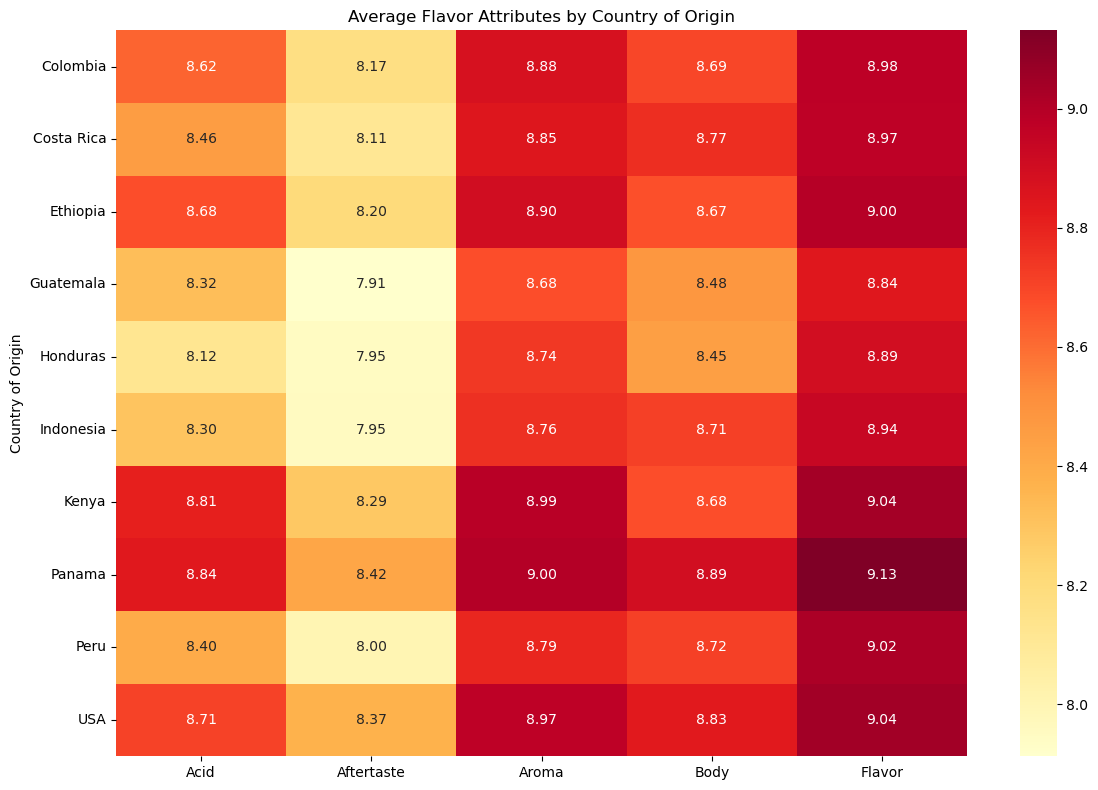

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('coffee_lat_lon_combined.csv')

# Create a heatmap of flavor attributes by top countries
top_countries = df['Country of Origin'].value_counts().head(10).index
flavor_cols = ['Acid', 'Aftertaste', 'Aroma', 'Body', 'Flavor']

flavor_by_country = df[df['Country of Origin'].isin(top_countries)][['Country of Origin'] + flavor_cols].groupby('Country of Origin').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(flavor_by_country, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Flavor Attributes by Country of Origin')
plt.tight_layout()
plt.show()

Roast Level and Rating: Understanding how different roast levels affect the overall rating of the coffee can guide recommendations for those who prefer certain roast profiles.

1. This boxplot shows how different roast levels affect coffee ratings. Medium and Medium-Light roasts tend to receive slightly higher ratings overall.
2. The scatterplot reveals there isn't a strong linear relationship between cost and rating, suggesting that expensive coffee doesn't necessarily guarantee higher ratings.

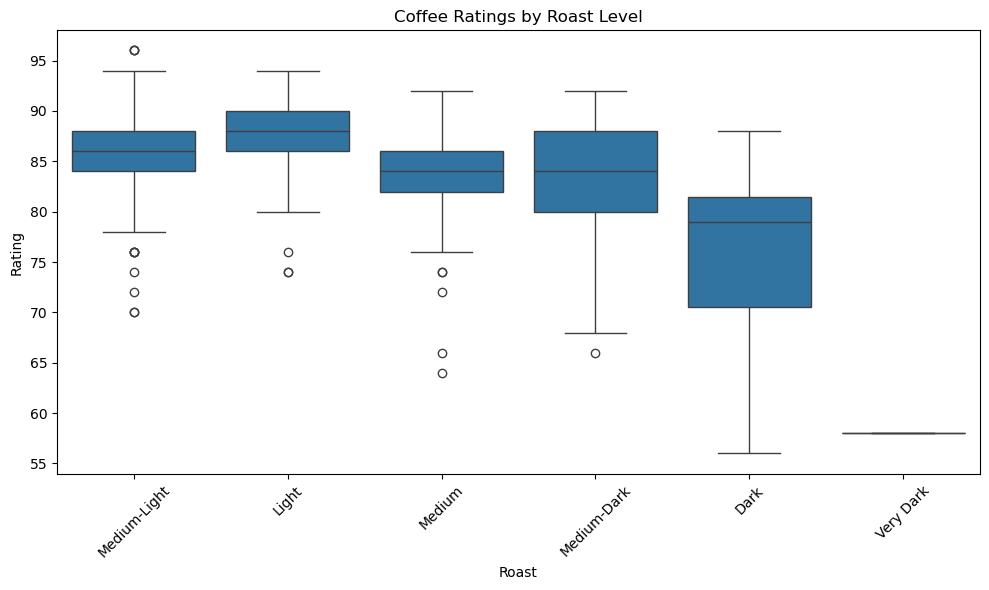

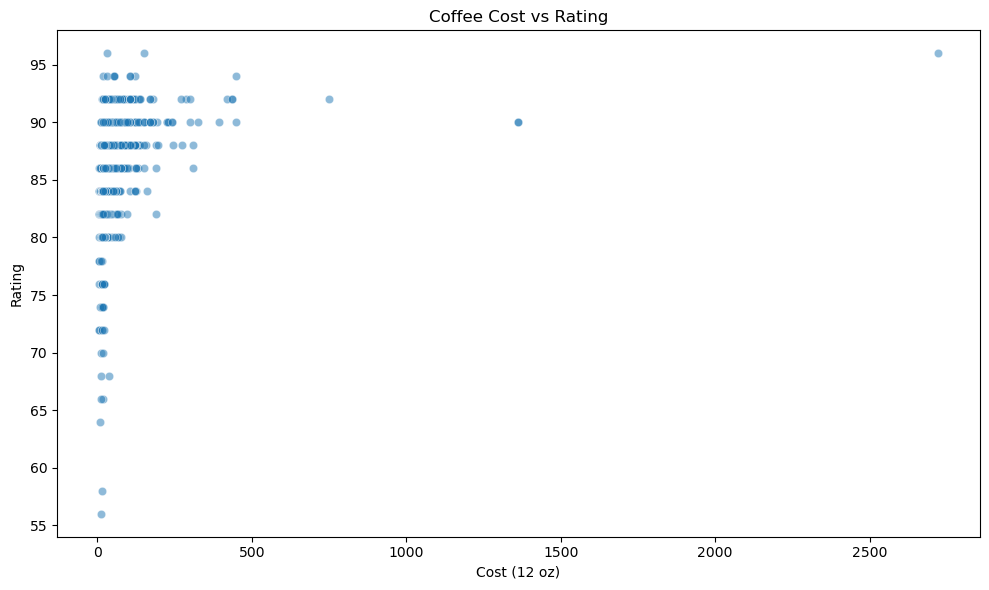

In [4]:
# 1. Roast Level and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Roast', y='Rating')
plt.title('Coffee Ratings by Roast Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Cost vs Rating Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cost 12Oz', y='Rating', alpha=0.5)
plt.title('Coffee Cost vs Rating')
plt.xlabel('Cost (12 oz)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


Geographical Location and Coffee Characteristics: Examining the relationship between the geographical origin (latitude and longitude) and coffee characteristics like acidity, aroma, and body can provide insights into regional coffee profiles.

SCATTER PLOT:
each point is representing a coffee's origin location on a longitude/latitude scale and the colors indicate the intensity of each characteristic but the main point is that most coffee production is concentrated around the "coffee belt" which is between the tropics of Cancer and Capricorn.

BAR CHART:
shows the average characteristics by geographical region, where in the tropical region contains the most samples (1,906) and shows consistently high scores across all characteristics. Particularlly strong in flavor and aroma.
The northern region has fewer samples (19) and shows slightly lower scores in acid but is strong in aroma and flavor.
The southern region has very limited data and is not statistically significant due to the small sample size.

But the things to keep in mind here are that the majority of high quality coffees come from the tropical region which is where acid levels also tend to be the highest. Flavor and aroma scores are consistently high across all regions. Body characteristics show slight variations but remain relatively consistent.

This data confirms why the tropical "coffee belt" is considered optimal for coffee production with ideal growing conditions that produce well-balanaced coffee characteristics

C:\Users\jrams\AppData\Local\Temp\ipykernel_27064\2146519233.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


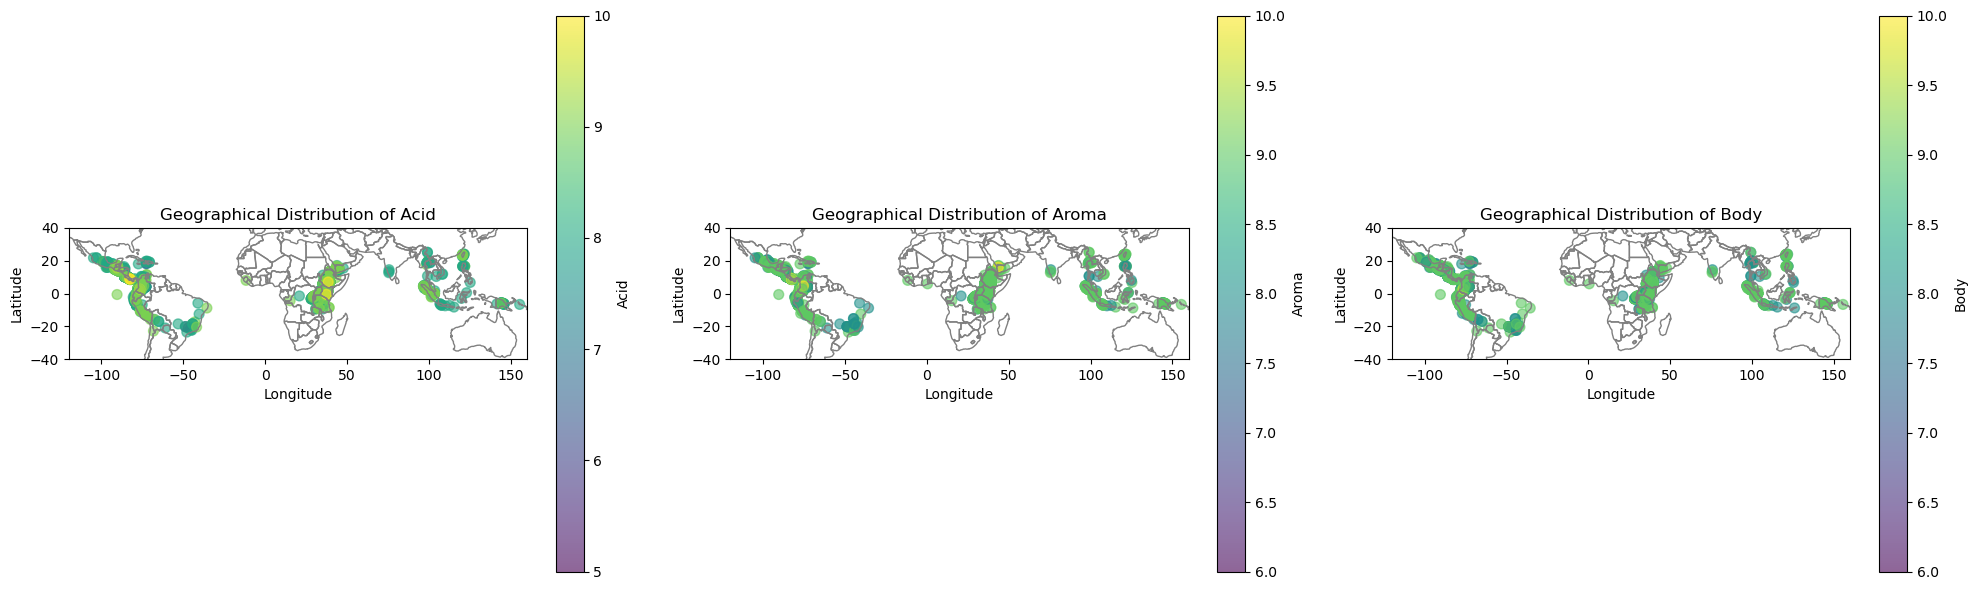

Coffee Belt Statistics (between 23.5°N and 23.5°S):
Number of samples: 1909
Average characteristics in the Coffee Belt:
Acid     8.58
Aroma    8.86
Body     8.66
dtype: float64
Top producing countries in the Coffee Belt:
Country of Origin
Ethiopia      520
Colombia      367
Guatemala     206
Kenya         152
Costa Rica    106
Name: count, dtype: int64


C:\Users\jrams\AppData\Local\Temp\ipykernel_27064\2146519233.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_chars = df.groupby('Region')[['Acid', 'Aroma', 'Body', 'Flavor', 'Aftertaste']].mean()


<Figure size 1200x600 with 0 Axes>

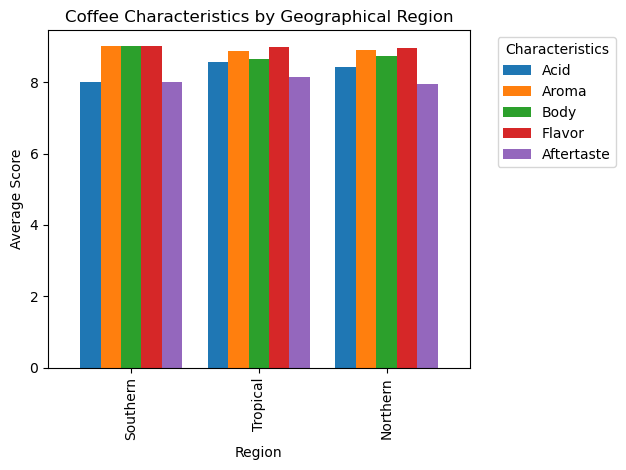

Average characteristics by region:
          Acid  Aroma  Body  Flavor  Aftertaste
Region                                         
Southern  8.00   9.00  9.00    9.00        8.00
Tropical  8.57   8.86  8.66    8.98        8.14
Northern  8.41   8.89  8.74    8.95        7.95
Number of samples in each region:
Region
Tropical    1906
Northern      19
Southern       1
Name: count, dtype: int64


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Create three separate plots for each characteristic
characteristics = ['Acid', 'Aroma', 'Body']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for idx, characteristic in enumerate(characteristics):
    # Plot world map
    world.boundary.plot(ax=axes[idx], linewidth=1, color='gray')
    
    # Create scatter plot
    scatter = axes[idx].scatter(df['Origin Longitude'], 
                              df['Origin Latitude'],
                              c=df[characteristic],
                              cmap='viridis',
                              alpha=0.6,
                              s=50)
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[idx], label=characteristic)
    
    # Set title and labels
    axes[idx].set_title(f'Geographical Distribution of {characteristic}')
    axes[idx].set_xlabel('Longitude')
    axes[idx].set_ylabel('Latitude')
    
    # Set reasonable axis limits to focus on main coffee regions
    axes[idx].set_xlim(-120, 160)
    axes[idx].set_ylim(-40, 40)

plt.tight_layout()
plt.show()

# Print some statistics about the coffee belt region
coffee_belt = df[
    (df['Origin Latitude'] >= -23.5) & 
    (df['Origin Latitude'] <= 23.5)
]

print("\
Coffee Belt Statistics (between 23.5\u00b0N and 23.5\u00b0S):")
print(f"Number of samples: {len(coffee_belt)}")
print("\
Average characteristics in the Coffee Belt:")
print(coffee_belt[characteristics].mean().round(2))

# Print top producing countries in the coffee belt
print("\
Top producing countries in the Coffee Belt:")
print(coffee_belt['Country of Origin'].value_counts().head())

# Calculate regional averages
df['Region'] = pd.cut(df['Origin Latitude'], 
                     bins=[-90, -23, 23, 90],
                     labels=['Southern', 'Tropical', 'Northern'])

# Calculate average characteristics by region
regional_chars = df.groupby('Region')[['Acid', 'Aroma', 'Body', 'Flavor', 'Aftertaste']].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
regional_chars.plot(kind='bar', width=0.8)
plt.title('Coffee Characteristics by Geographical Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.legend(title='Characteristics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the actual values
print("\
Average characteristics by region:")
print(regional_chars.round(2))

# Calculate the number of samples in each region
region_counts = df['Region'].value_counts()
print("\
Number of samples in each region:")
print(region_counts)